In [1]:
# Step 1: Data Acquisition
import pandas as pd

# Read the dataset
df = pd.read_csv('hotel_bookings.csv')

In [2]:
# Step 2: Data Cleaning and Preparation
# Remove unnecessary columns
df = df.drop(columns=['company'])

# Handle missing values
df = df.dropna()


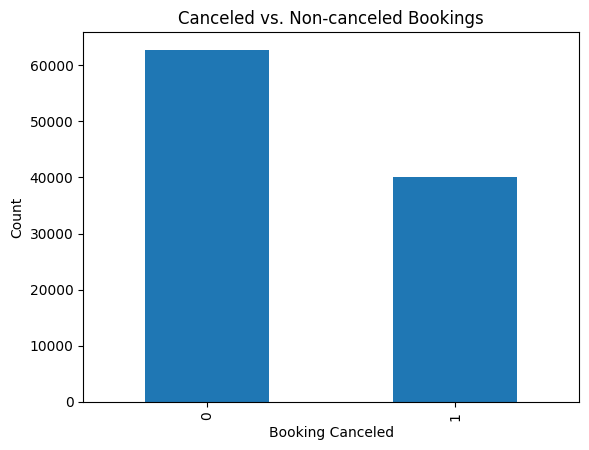

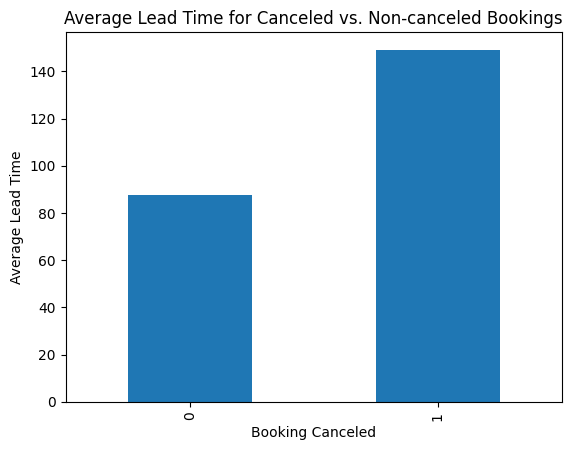

In [3]:
# Step 3: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt

# Distribution of canceled and non-canceled bookings
df['is_canceled'].value_counts().plot(kind='bar')
plt.xlabel('Booking Canceled')
plt.ylabel('Count')
plt.title('Canceled vs. Non-canceled Bookings')
plt.show()

# Average lead time for bookings
df.groupby('is_canceled')['lead_time'].mean().plot(kind='bar')
plt.xlabel('Booking Canceled')
plt.ylabel('Average Lead Time')
plt.title('Average Lead Time for Canceled vs. Non-canceled Bookings')
plt.show()


In [9]:
# Step 4: Customer Segmentation
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features for clustering
features = ['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(scaled_features)

# Examine the clusters
print(df.groupby('cluster')['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies'].mean())


/opt/homebrew/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


          lead_time  arrival_date_week_number  stays_in_weekend_nights  \
cluster                                                                  
0        208.817307                 31.508892                 1.469934   
1         83.223822                 28.859948                 1.235602   
2         90.542771                 27.267598                 1.094685   
3         58.194147                 24.896390                 0.673063   

         stays_in_week_nights    adults  children    babies  
cluster                                                      
0                    3.660040  2.013848  0.002988  0.000000  
1                    3.132199  1.992147  0.204188  1.036649  
2                    2.790780  1.956249  1.460755  0.000000  
3                    1.932474  1.825059  0.000000  0.000000  


/var/folders/jp/hh4th2952wl2kxp08wsljfr40000gn/T/ipykernel_18308/775914494.py:17: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(df.groupby('cluster')['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies'].mean())


In [11]:
# Step 5: Booking Cancellation Analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X = df[['lead_time', 'arrival_date_week_number', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies']]
y = df['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

Accuracy: 0.6498372126925507
Precision: 0.6077941543842118
Recall: 0.30152435246003223
F1 Score: 0.40308151093439365


/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


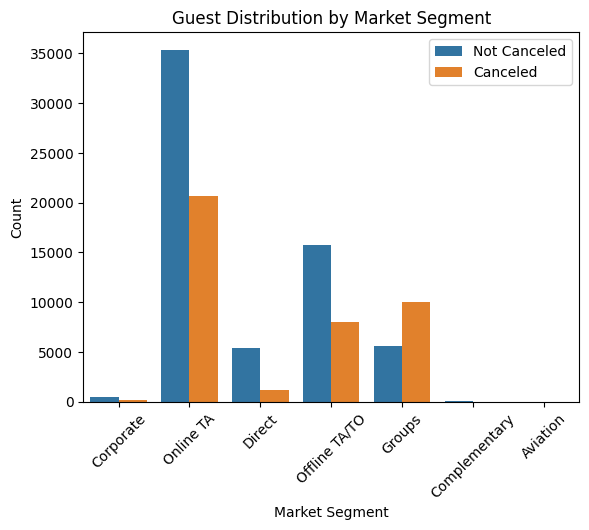

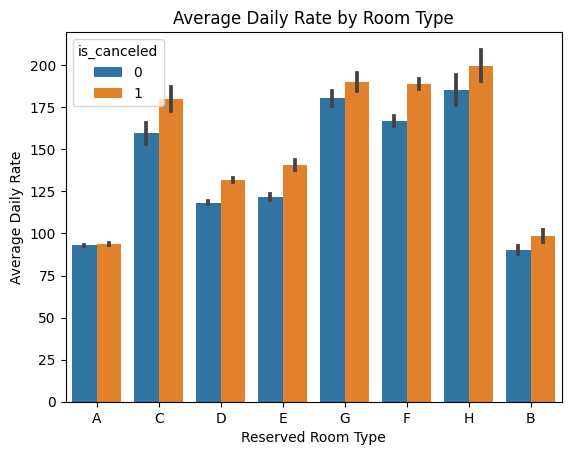

In [12]:
# Step 6: Customer Preference Analysis
import seaborn as sns

# Guest distribution by market segment
sns.countplot(x='market_segment', hue='is_canceled', data=df)
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.title('Guest Distribution by Market Segment')
plt.xticks(rotation=45)
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

# Average daily rate by room type
sns.barplot(x='reserved_room_type', y='adr', hue='is_canceled', data=df)
plt.xlabel('Reserved Room Type')
plt.ylabel('Average Daily Rate')
plt.title('Average Daily Rate by Room Type')
plt.show()

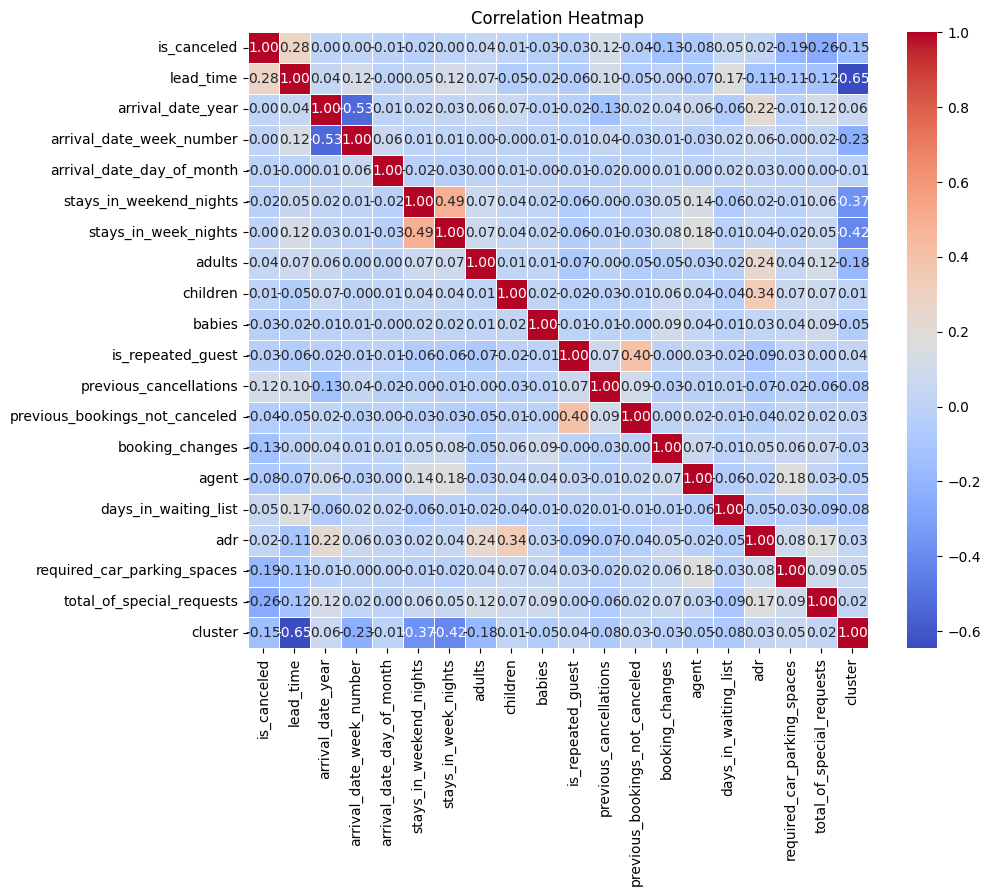

In [15]:
# Step 7: Data Reporting and Visualization
import seaborn as sns

# Correlation heatmap
corr_matrix = df.corr(numeric_only=True) 
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

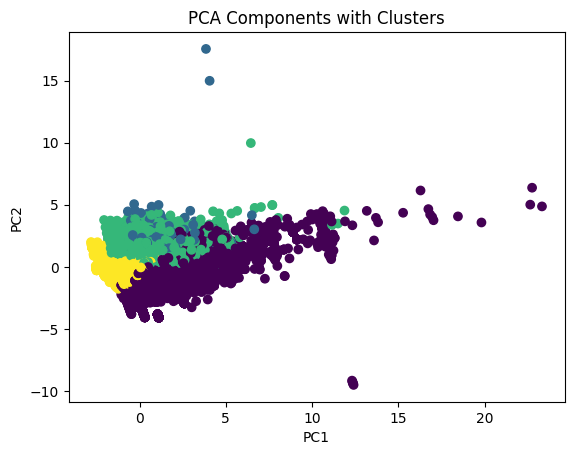

In [14]:
# Step 8: Predictive Modeling - Guest Segmentation
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Plot the PCA components and clusters
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Components with Clusters')
plt.show()
